In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from constants import DATADIR_aparc_ALLASDINC

In [2]:
TD_APARC_DIR = 'D:\\PhD\\Data\\aparc\\df_td_aparc_ALLASDINC.csv'
ASD_APARC_DIR = 'D:\\PhD\\Data\\aparc\\df_asd_aparc_ALLASDINC.csv'
TD_A2009S_DIR = 'D:\\PhD\\Data\\a2009s\\df_td_a2009s_ALLASDINC.csv'
ASD_A2009S_DIR = 'D:\\PhD\\Data\\a2009s\\df_asd_a2009s_ALLASDINC.csv'

## Cleaning APARC data

In [3]:
df_td_aparc = pd.read_csv(TD_APARC_DIR, index_col=0)
df_td_aparc.head()
df_td_aparc.shape

(528, 547)

In [4]:
df_asd_aparc = pd.read_csv(ASD_APARC_DIR, index_col=0)
df_asd_aparc.head()

,area_lbankssts_med,area_lbankssts_20-80range,area_lcaudalanteriorcingulate_med,area_lcaudalanteriorcingulate_20-80range,area_lcaudalmiddlefrontal_med,area_lcaudalmiddlefrontal_20-80range,area_lcuneus_med,area_lcuneus_20-80range,area_lentorhinal_med,area_lentorhinal_20-80range,...,volume_rfrontalpole_20-80range,volume_rtemporalpole_med,volume_rtemporalpole_20-80range,volume_rtransversetemporal_med,volume_rtransversetemporal_20-80range,volume_rinsula_med,volume_rinsula_20-80range,age,sex,labels
Caltech_0051456,0.712938,0.522980,0.646741,0.477187,0.577936,0.558109,0.573381,0.520365,0.654735,0.557382,...,2.257205,3.328883,3.246739,1.801949,1.600731,0.000000,2.043520,55.4,1,0
Caltech_0051457,0.691159,0.542991,0.657722,0.616444,0.639428,0.556972,0.618710,0.603067,0.661457,0.541071,...,2.416651,3.602563,4.038680,1.649104,1.421252,0.224715,1.970336,22.9,1,0
Caltech_0051458,0.719259,0.475692,0.631136,0.547493,0.590005,0.546203,0.582499,0.576788,0.647308,0.485646,...,2.750852,3.489909,4.285996,1.478723,1.455796,0.000000,1.917016,39.2,1,0
Caltech_0051459,0.727622,0.518204,0.694547,0.535396,0.622977,0.531531,0.622482,0.575251,0.710569,0.521697,...,2.884054,3.858876,4.188301,1.658662,1.585537,0.305968,2.130467,22.8,1,0
Caltech_0051460,0.707880,0.481792,0.653682,0.629811,0.633001,0.551114,0.639174,0.538454,0.663805,0.552818,...,2.119795,3.222828,3.132810,1.602545,1.466445,0.326807,2.030386,34.6,2,0


In [5]:
df_asd_aparc['labels']=1
df_asd_aparc.head()
df_asd_aparc.shape

(441, 547)

In [6]:
df_asd_aparc.shape, df_td_aparc.shape

((441, 547), (528, 547))

In [7]:
df_aparc = pd.concat([df_asd_aparc, df_td_aparc], axis=0)
df_aparc.shape

(969, 547)

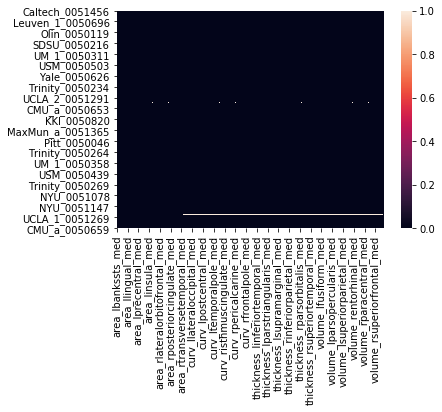

In [8]:
sns.heatmap(pd.isna(df_aparc))

In [9]:
index_nan = np.unique(np.where(pd.isna(df_aparc))[0])
for v in index_nan:
    print(df_aparc.index[v])
    print(df_aparc.iloc[v,-1])

MaxMun_a_0051318
1
UM_1_0050288
1
UCLA_2_0051296
1
UM_1_0050272
1
UM_1_0050274
1
UM_1_0050277
1
UM_1_0050283
1
UM_1_0050327
0
Stanford_0051190
0
UCLA_1_0051257
0
UCLA_1_0051258
0


In [10]:
df_aparc_nona = df_aparc.dropna()
df_aparc.shape, df_aparc_nona.shape

((969, 547), (958, 547))

In [11]:
df_aparc_nona.to_csv(DATADIR_aparc_ALLASDINC)

In [12]:
ind = df_asd_aparc.index
NY = []
for i in ind:
    if 'NY' in i.split('_')[0]:
        NY.append(i)
print(len(NY))

38


In [13]:
ind = df_td_aparc.index
NY = []
for i in ind:
    if 'NY' in i.split('_')[0]:
        NY.append(i)
print(len(NY))

100


In [14]:
def update_cols_suffix(old_feats, suffix1, suffix2):
    updated_feats = list()
    for feat in old_feats:
        featL = feat.split('_')
        morph = featL[-1]
        if 'med' in morph:
            morph = suffix1
        else:
            morph = suffix2
        featL[-1] = morph
        updated_feats.append('_'.join(featL))
    # Fix for age, sex, labels
    updated_feats[-1] = old_feats[-1]
    updated_feats[-2] = old_feats[-2]
    updated_feats[-3] = old_feats[-3]

    return updated_feats


def suffix1_fc(c1, c2):
    return c1-c2


def suffix2_fc(c1, c2):
    return c1+c2

def modifyMedRange2MedPlusMinusRange(df):
    """
    Convert the data representation from 1 column median, and 1 column IQR into
    1 column median-IQR, and 1 column median+IQR for each morphological feature for each brain region
    :param df: pandas.DataFrame
    :return updated_df: pandas.DataFrame
    """
    old_feats = df.columns.to_list()
    suffix1 = "medMIQR"
    suffix2 = "medPIQR"
    updated_feats = update_cols_suffix(old_feats, suffix1, suffix2)
    updated_df = pd.DataFrame(None, index=df.index, columns=updated_feats)
    for feat in updated_df.columns:
        if 'age' in feat or 'sex' in feat or 'labels' in feat:
            updated_df[feat] = df[feat]
            continue
        morph, brainreg, _ = feat.split('_')
        required_cols_from_old_df = ['_'.join([morph,brainreg,'med']),
                                     '_'.join([morph,brainreg,'20-80range'])]
        med_iqr_df = df[required_cols_from_old_df]
        if suffix1 in feat:
            updated_df[feat] = suffix1_fc(med_iqr_df.iloc[:, 0], med_iqr_df.iloc[:, 1])
        elif suffix2 in feat:
            updated_df[feat] = suffix2_fc(med_iqr_df.iloc[:, 0], med_iqr_df.iloc[:, 1])
        else:
            raise ValueError("Updated columns have an undefined problem!")

    return updated_df


In [15]:
df_aparc_final = modifyMedRange2MedPlusMinusRange(df_aparc_nona)
df_aparc_final.head()
df_aparc_final.to_csv("DrEid_brain_sMRI_lr_TDASD.csv")

## Cleaning a2009s data

In [1]:
from joblib import load

In [2]:
obj = load('./Results/site_analysis//obj_left_rf_SDSU.joblib')

In [5]:
(obj.ranking_==1).sum()

46

In [6]:
len(obj.ranking_)

272

In [8]:
obj.grid_scores_.max()

0.6583333333333333